In [1]:
# Dhiraj Wagh

In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow import keras

# import functions from keras and tf for CNN model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D

# importing the fashion_mnist dataset from keras
from keras.datasets import fashion_mnist

from keras import backend as k
from numpy import mean

In [41]:
BATCH_SIZE = 300,
EPOCH = 20
image_row, image_column = 28,28
INPUT_SHAPE = (image_row,image_column,1)
NUMBER_OF_CLASSES = 10 
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
#loading the fashion_minst data in train and test data respectively 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [43]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [44]:
# normalization for x_train and x_test
if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0],1, image_row,image_column)
  x_test = x_test.reshape(x_test.shape[0],1, image_row,image_column)
  INPUT_SHAPE = (image_row,image_column,1)

else:
  x_train = x_train.reshape(x_train.shape[0],image_row,image_column,1)
  x_test = x_test.reshape(x_test.shape[0],image_row,image_column,1)
  INPUT_SHAPE = (image_row,image_column,1)


x_train = x_train/255.0
x_test = x_test/255.0

print("the train shape:  ", x_train.shape)

print("testing shape:  ", x_test.shape)

the train shape:   (60000, 28, 28, 1)
testing shape:   (10000, 28, 28, 1)


In [45]:
no_of_class = len(set(y_train))

In [46]:
y_train = keras.utils.to_categorical(y_train)
y_test_1 = keras.utils.to_categorical(y_test)

In [47]:
# CNN model building

cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

cnn_model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))

cnn_model.add(MaxPool2D(pool_size =(2,2)))

cnn_model.add(tf.keras.layers.Dense(units = 64, activation = 'tanh'))

cnn_model.add(Dropout(0.5, noise_shape=None, seed=None))

cnn_model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

cnn_model.add(tf.keras.layers.Flatten())

cnn_model.add(Dense(NUMBER_OF_CLASSES,  activation= 'softmax'))

In [48]:
cnn_model.compile(loss= keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              metrics=['accuracy'])

In [49]:
cnn=cnn_model.fit(x_train, y_train,batch_size=1000,epochs=20, validation_data= (x_test, y_test_1))

Epoch 1/20
60/60 [==============================] - 61s 1s/step - loss: 1.3476 - accuracy: 0.5487 - val_loss: 0.8001 - val_accuracy: 0.7104
Epoch 2/20
60/60 [==============================] - 60s 1s/step - loss: 0.6578 - accuracy: 0.7568 - val_loss: 0.6039 - val_accuracy: 0.7813
Epoch 3/20
60/60 [==============================] - 61s 1s/step - loss: 0.5903 - accuracy: 0.7823 - val_loss: 0.5560 - val_accuracy: 0.8005
Epoch 4/20
60/60 [==============================] - 60s 1s/step - loss: 0.5342 - accuracy: 0.8053 - val_loss: 0.5298 - val_accuracy: 0.8110
Epoch 5/20
60/60 [==============================] - 61s 1s/step - loss: 0.4919 - accuracy: 0.8240 - val_loss: 0.4748 - val_accuracy: 0.8302
Epoch 6/20
60/60 [==============================] - 61s 1s/step - loss: 0.4595 - accuracy: 0.8355 - val_loss: 0.4716 - val_accuracy: 0.8299
Epoch 7/20
60/60 [==============================] - 60s 1s/step - loss: 0.4374 - accuracy: 0.8436 - val_loss: 0.4410 - val_accuracy: 0.8420
Epoch 8/20
60/60 [==

In [51]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (1000, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (1000, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (1000, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dense_6 (Dense)             (1000, 12, 12, 64)        4160      
                                                                 
 dropout_2 (Dropout)         (1000, 12, 12, 64)        0         
                                                                 
 dense_7 (Dense)             (1000, 12, 12, 128)       8320      
                                                      

In [52]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [53]:
keras.utils.plot_model(cnn_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [54]:
print('Training Accuracy : %2f'%(mean(cnn.history['accuracy'])*100))
print('Validation Accuracy  : %2f'%(mean(cnn.history['val_accuracy'])*100))
print('Training Loss : %2f'%(mean(cnn.history['loss'])*100))
print('Validation Loss : %2f'%(mean(cnn.history['val_loss'])*100))

Training Accuracy : 83.717666
Validation Accuracy  : 84.695500
Training Loss : 45.873395
Validation Loss : 43.103071


In [55]:
y_hat = cnn_model.predict(x_test).argmax(axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_hat,y_test)
print(cm)

[[835   2  17  15   1   0 126   0   4   0]
 [  1 965   1   5   1   0   1   0   2   0]
 [ 10   0 788   8  30   0  65   0   2   0]
 [ 35  23   9 920  37   2  32   0  10   0]
 [  8   5 106  25 883   0 101   0   9   0]
 [  1   0   0   0   0 952   0   4   3   3]
 [101   4  78  27  47   0 672   0  14   0]
 [  0   0   0   0   0  33   0 969   5  43]
 [  9   1   1   0   1   1   3   0 951   1]
 [  0   0   0   0   0  12   0  27   0 953]]


<AxesSubplot:>

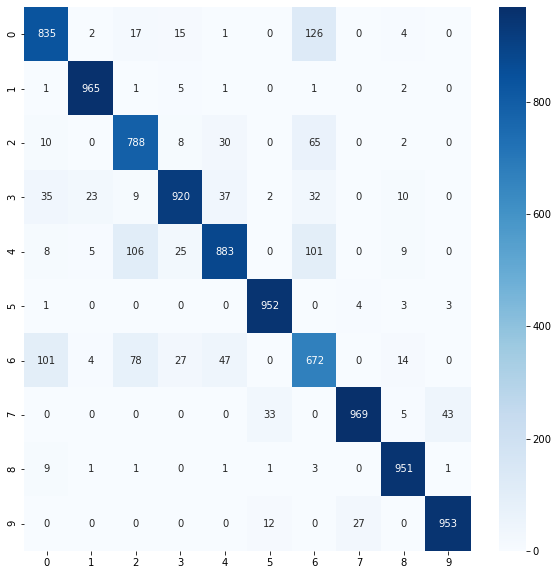

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='g')

In [57]:
import sklearn.metrics
sklearn.metrics.accuracy_score(y_hat, y_test)

0.8888